In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pwd

'/Users/bojk/Google Drive/QuakeLab/semiAnnotate'

In [ ]:
AA_meta = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/pancreas_adult_annotation_table.csv')
AA_meta['idx'] = 'X'+AA_meta['c1_chip_id'].astype(str)+'.'+AA_meta['capture_position']
AA_meta.set_index('idx',inplace=True)

AAtsne = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingTSNETable.csv',sep=',')
AAtsne.set_index(AAtsne['Unnamed: 0'].str[1:],inplace=True)
AAtsne.index = 'X'+AAtsne.index
AAtsne.rename(index=str,columns={'Unnamed: 1': 'Dim1','Unnamed: 2':'Dim2'},inplace=True)
AA_meta = AA_meta.join(AAtsne[['Dim1','Dim2','celltypes']],how='inner')
AA_meta.dropna(how='all',axis=1,inplace=True)

In [5]:
metadata_new = pd.read_csv('../Data/SemiAnnotate/Pancreas/manual_annotation_EngePancreas.csv',index_col=0)

In [15]:
metadata.head(2)
#metadata.columns

,unique_key,Key,age,c1_chip_id,capture_position,chip_type,enrichment_method,experiment_name,experimenter,fragAnalyzerRange,...,Dim1,Dim2,celltypes,n_reads,new_tsne1,new_tsne2,dist_to_class_median,radius_annot,man_annot,man_annot2
X1000010011.A02,1000010011.A02,NaN,21,1000010011,A02,NaN,islet,panc_21y_141021,martin,NaN,...,11.612487,47.321479,alpha,205682.0,-24.368740,-48.594223,20.322368,alpha,alpha,alpha
X1000010011.A06,1000010011.A06,NaN,21,1000010011,A06,NaN,islet,panc_21y_141021,martin,NaN,...,-14.742733,-87.763685,delta,366110.0,21.757227,17.534485,4.127053,delta,delta,delta


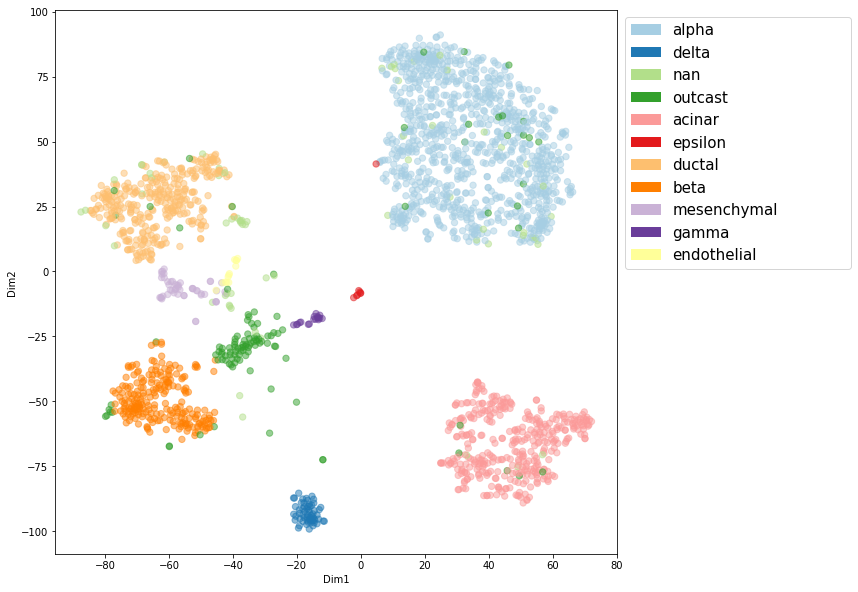

In [18]:
keys = metadata.man_annot.unique()
values = sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
newcolor = metadata['man_annot'].map(lut)

f,ax = plt.subplots(figsize=(12,10))
metadata.plot.scatter('Dim1','Dim2',s=40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,keys,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
#f.savefig(savedir+date+'/Figure_2B.png')
#f.savefig(savedir+date+'/Figure_2B.pdf')
plt.show()

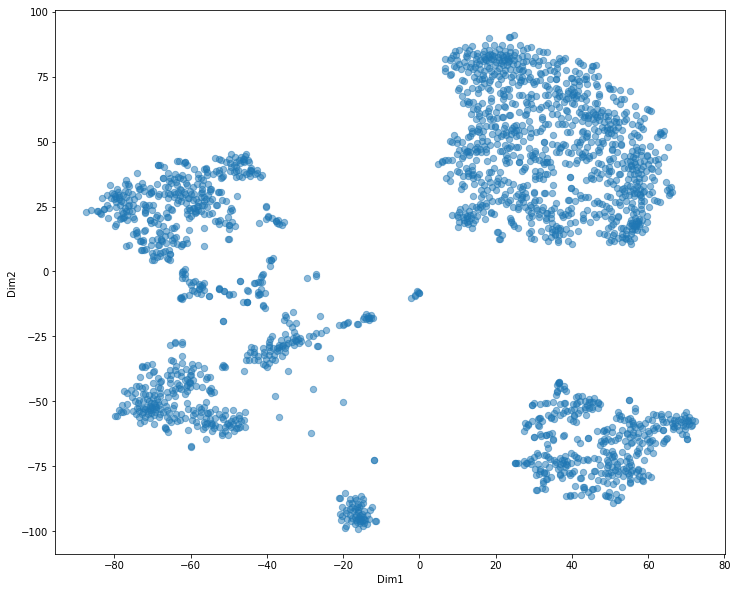

In [14]:
f,ax = plt.subplots(figsize=(12,10))
metadata.plot.scatter('Dim1','Dim2',s=40
                    ,alpha=.5,ax=ax)
plt.show()

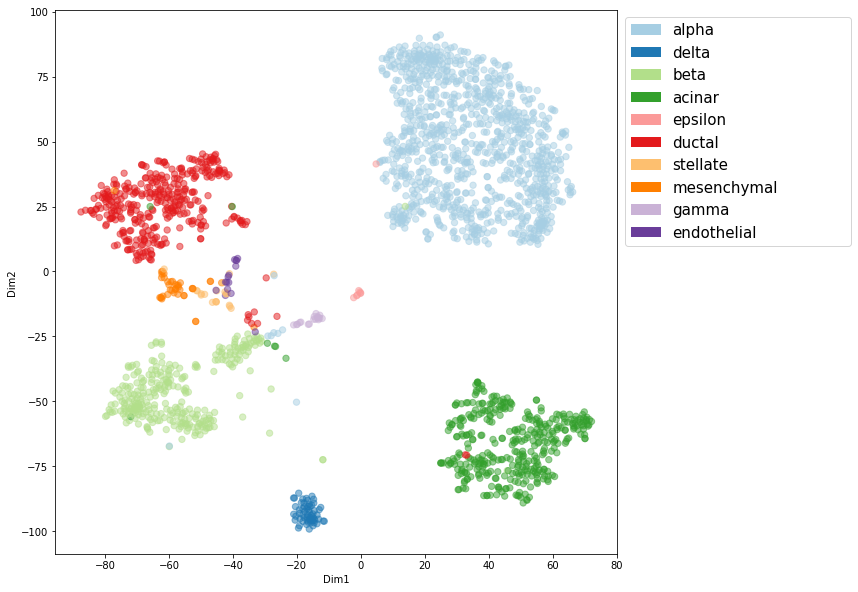

In [19]:
keys = metadata.celltypes.unique()
values = sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
newcolor = metadata['celltypes'].map(lut)

f,ax = plt.subplots(figsize=(12,10))
metadata.plot.scatter('Dim1','Dim2',s=40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,keys,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
#f.savefig(savedir+date+'/Figure_2B.png')
#f.savefig(savedir+date+'/Figure_2B.pdf')
plt.show()

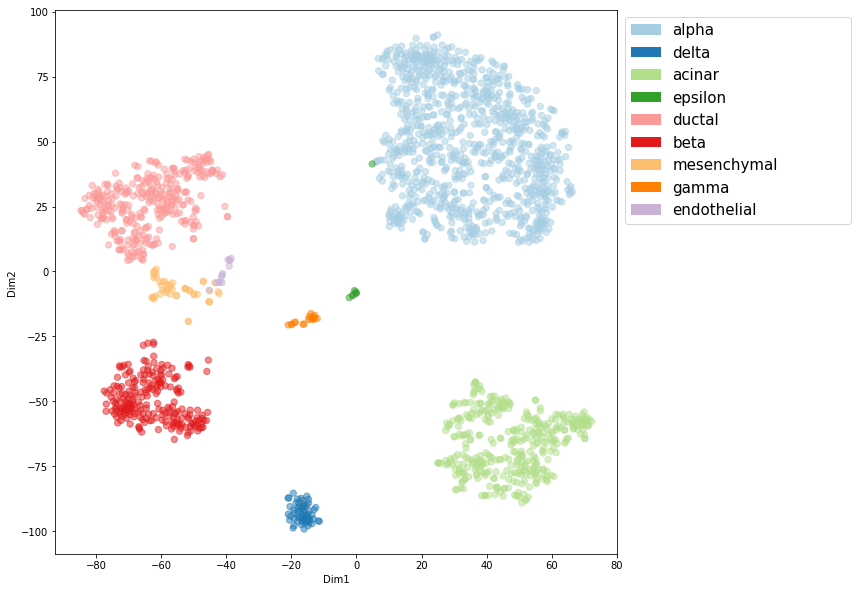

In [20]:
tmp = metadata[(metadata['man_annot']!='outcast')&(~metadata['man_annot'].isna())].copy()
keys = tmp.man_annot.unique()
values = sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
newcolor = tmp['man_annot'].map(lut)

f,ax = plt.subplots(figsize=(12,10))
tmp.plot.scatter('Dim1','Dim2',s=40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,keys,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
#f.savefig(savedir+date+'/Figure_2B.png')
#f.savefig(savedir+date+'/Figure_2B.pdf')
plt.show()

In [24]:
%pwd

'/Users/bojk/Google Drive/QuakeLab/semiAnnotate'

In [22]:
tmp.man_annot.value_counts()

alpha          955
acinar         371
ductal         326
beta           224
delta           60
mesenchymal     50
gamma           18
endothelial     13
epsilon          8
Name: man_annot, dtype: int64

In [25]:
tmp[['Dim1','Dim2','man_annot']].to_csv('../Data/SemiAnnotate/Pancreas/Enge_manual_annotation_conservative.csv')